# DATE : June 28,2025
# Lab No : 2
# Reg No : 2448004

# Program Question
## Q1.
 2.4 Compute the edit distance (using insertion cost 1, deletion cost 1, substitution cost 1) of “leda” to “deal”. Prepare an edit distance grid to complete your work.

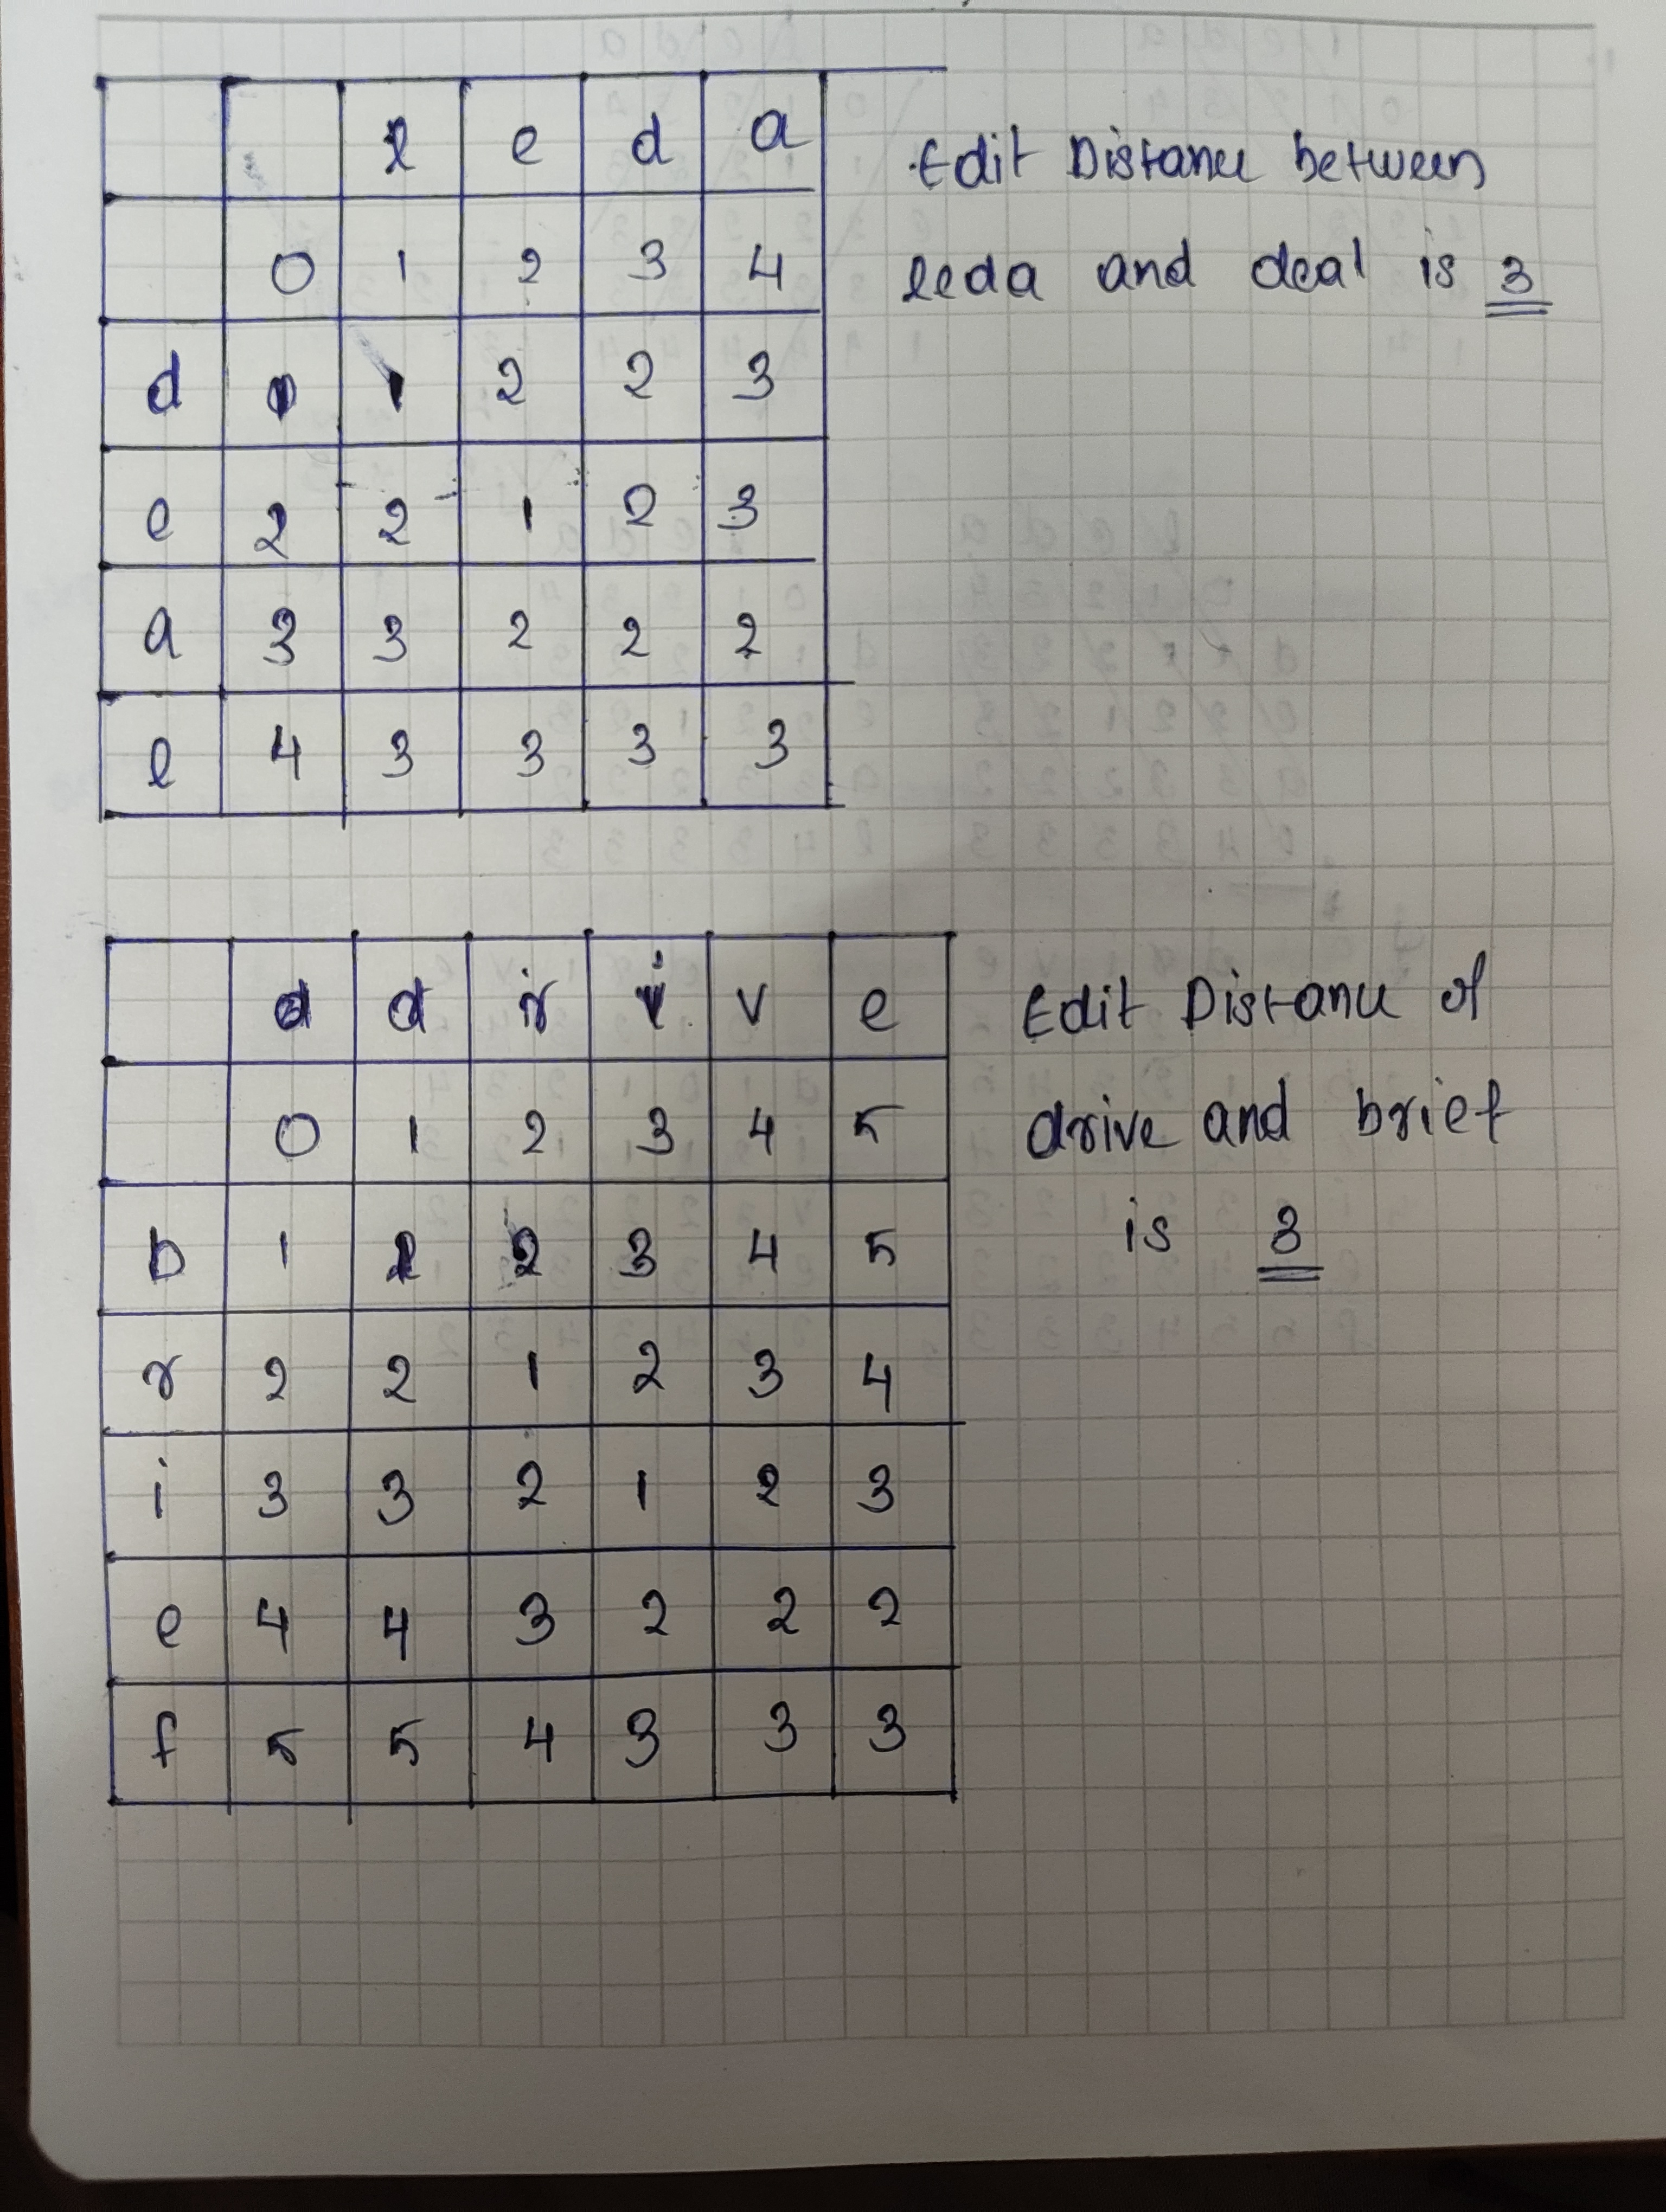 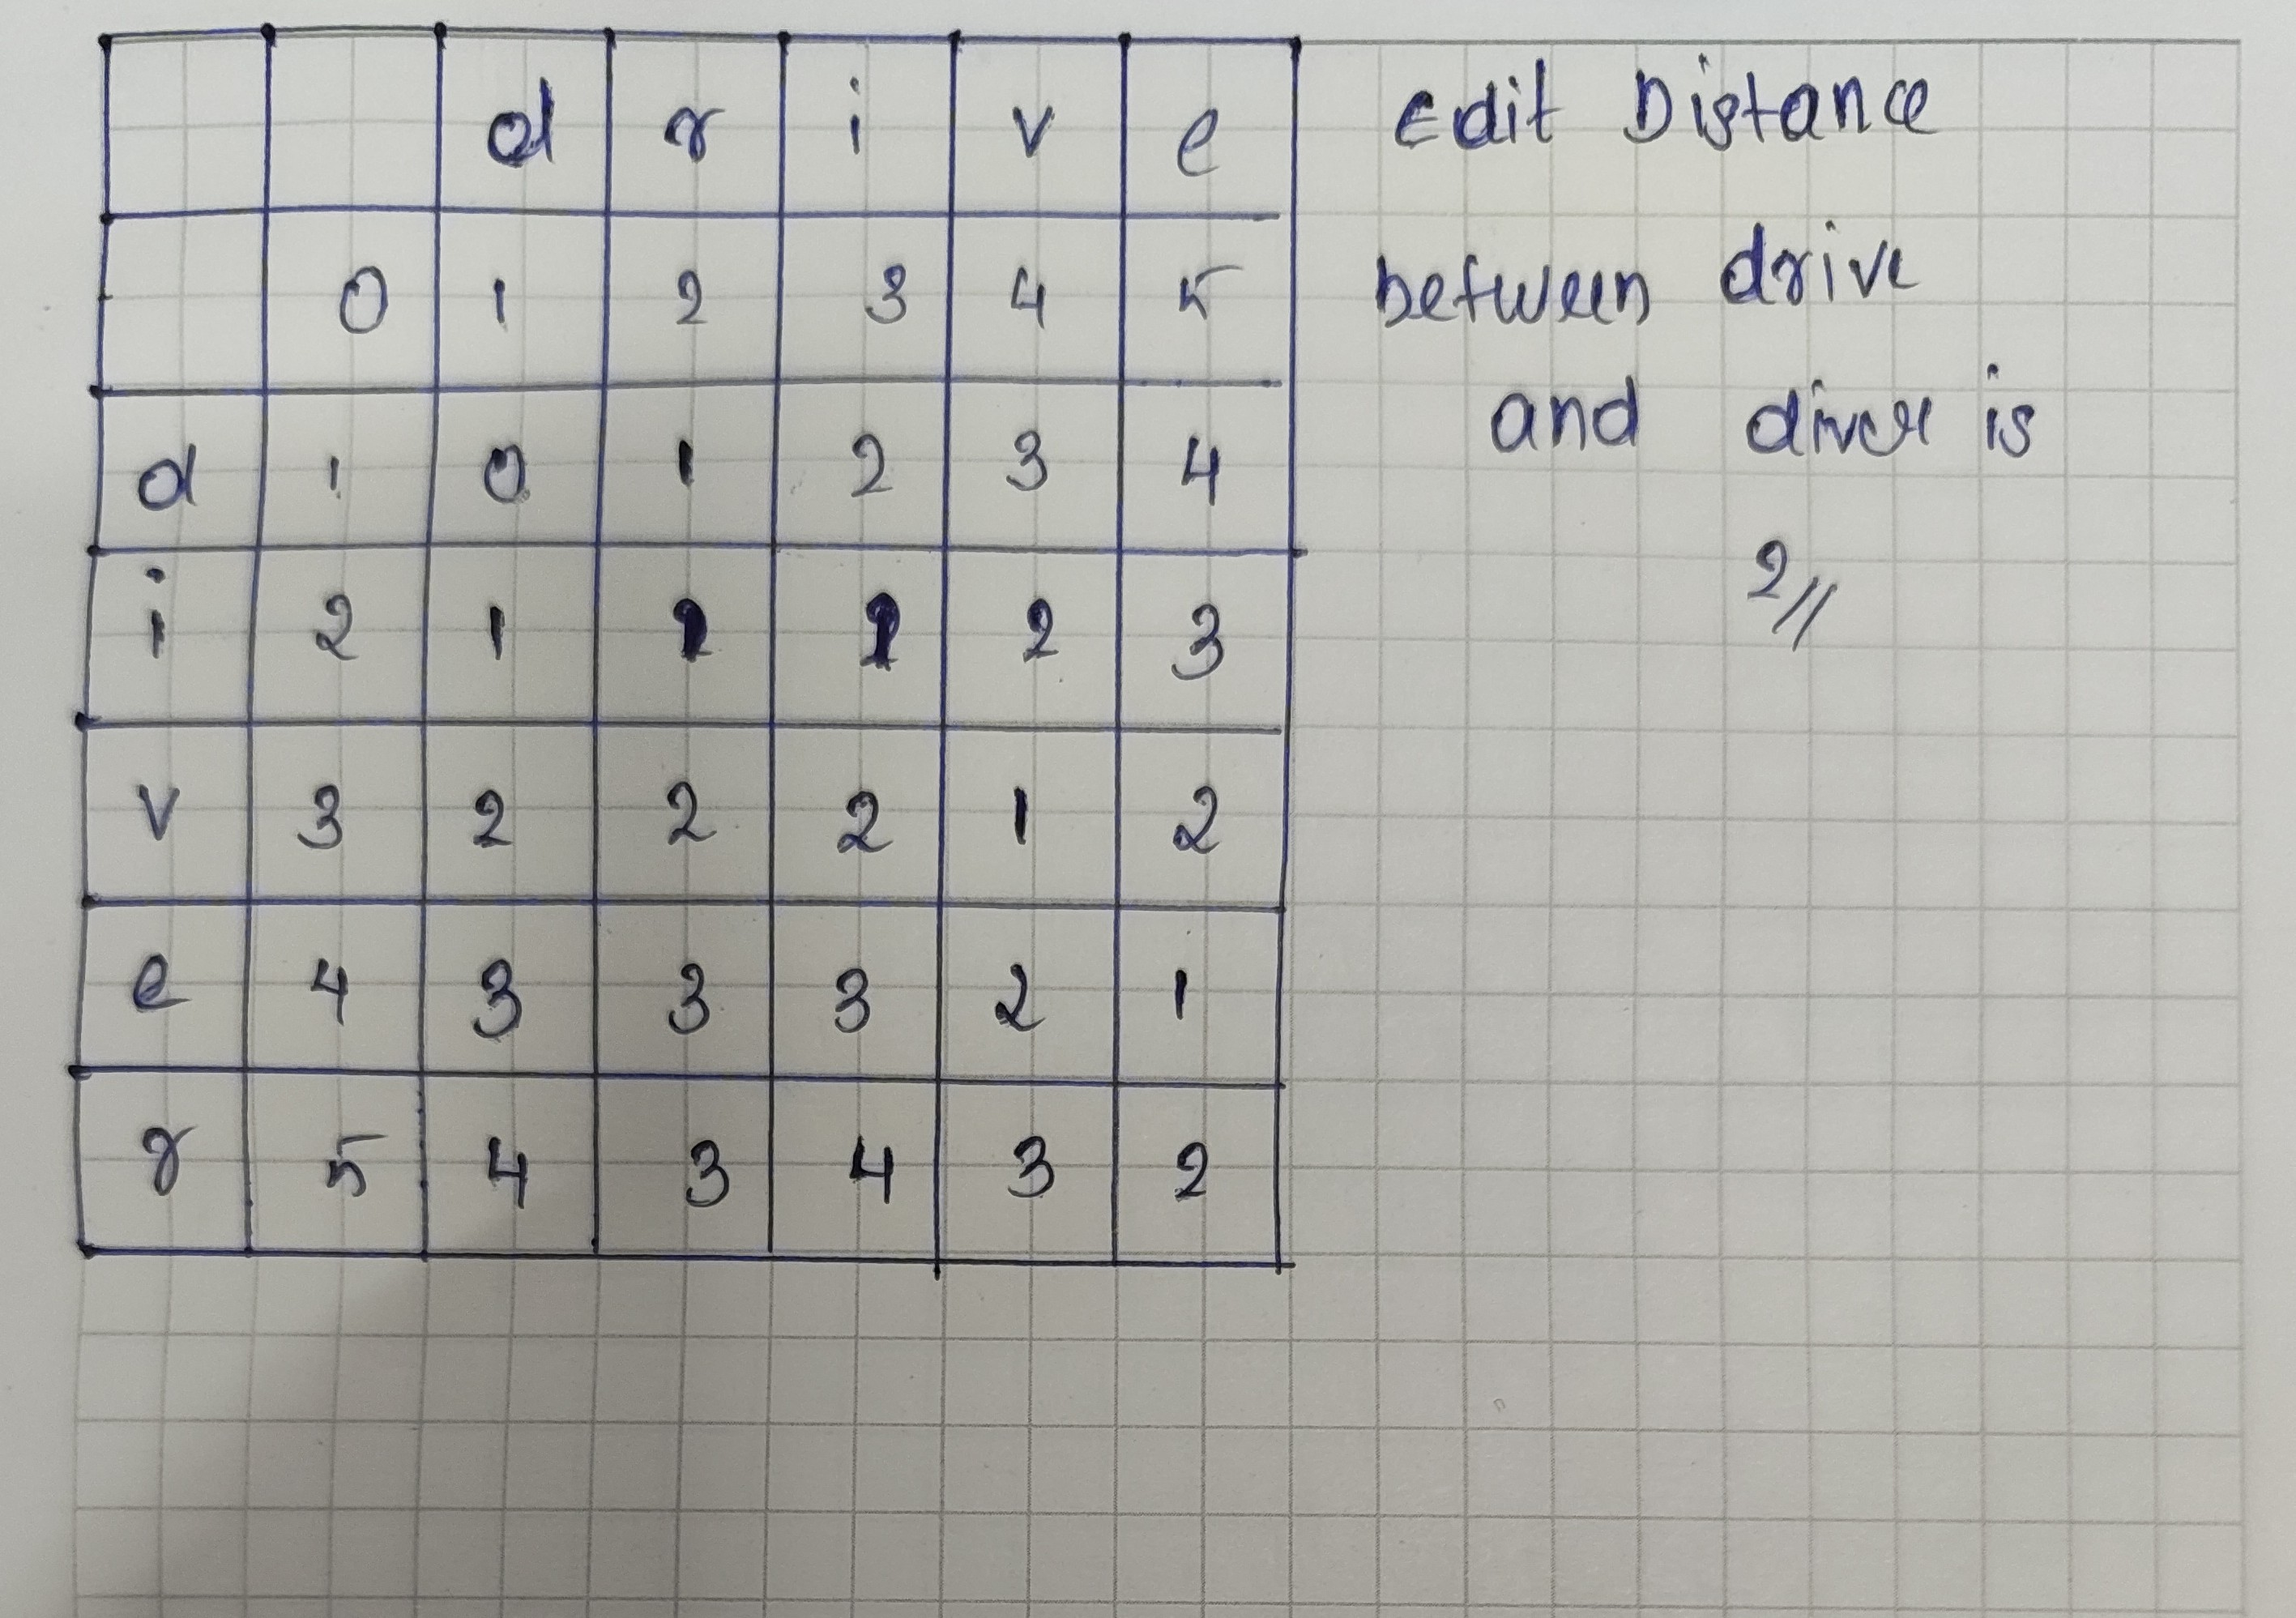

# Q2 Edit distance (Implementation)
2.6 Implement a minimum edit distance algorithm and use your hand-computed results to check your code.

In [3]:
def editdistance(str1, str2):
    m = len(str1)
    n = len(str2)

    # Initialize matrix of size (m+1) x (n+1)
    ed_matrix = [[0 for x in range(n + 1)] for x in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                ed_matrix[i][j] = j  # Cost of all insertions
            elif j == 0:
                ed_matrix[i][j] = i  # Cost of all deletions
            elif str1[i - 1] == str2[j - 1]:
                ed_matrix[i][j] = ed_matrix[i - 1][j - 1]  # No change
            else:
                ed_matrix[i][j] = 1 + min(
                    ed_matrix[i - 1][j],      # Deletion
                    ed_matrix[i][j - 1],      # Insertion
                    ed_matrix[i - 1][j - 1]   # Substitution
                )

    return ed_matrix[m][n]
    
  
            
          

In [4]:
editdistance("drive","diver")

2

In [5]:
ed_matrix = [[0 for x in range(5 + 1)] for x in range(4 + 1)]
ed_matrix

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

# Program Description
This program is used to calculate the Levenshtein distance between two given strings — that is, the minimum number of changes (insertions, deletions, or substitutions) needed to convert one string into the other.

For example, if you have two words like "leda" and "deal", the program tells you how many steps it would take to turn "leda" into "deal".

# Program Logic Explanation
1. Start with Two Strings
The user gives two input strings. In this case:

First string (original): "leda"

Second string (target): "deal"

2. Create a Grid for Comparison
A table (or grid) is used to store the number of steps required to match parts of the two strings.

The rows represent characters of the first string.

The columns represent characters of the second string.

3. Initialize the Table
The first row and the first column are filled with increasing numbers.

This represents the cost of converting an empty string to part of the other string using only insertions or deletions.

4. Compare Characters One by One
The program goes through each character of both strings and compares them:

If the characters are the same, no change is needed, so the value is copied from the diagonal cell.

If they are different, the program adds 1 to the minimum value among:

- Deleting a character

- Inserting a character

- Replacing a character

5. Store the Minimum Cost at Each Step
Each cell in the grid stores the least number of changes needed to match the corresponding parts of the strings.

6. Final Answer in Bottom-Right Cell
Once the entire table is filled, the bottom-right cell contains the minimum number of steps needed to change one full string into the other.

7. Display the Result
Finally, the program prints out the minimum number of edits (insertions, deletions, or substitutions) required.

# Q3. Implement Sequence Alignment
Write a program to align the given sequence of input text A and B


In [3]:

def align_sequences(A, B):
    m, n = len(A), len(B)
    gap_penalty = -2
    match_score = 1
    mismatch_penalty = -1

    # Initialize score matrix
    score = [[0] * (n + 1) for _ in range(m + 1)]

    # Fill first row and column
    for i in range(m + 1):
        score[i][0] = i * gap_penalty
    for j in range(n + 1):
        score[0][j] = j * gap_penalty

    # Fill the rest of the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if A[i - 1] == B[j - 1]:
                match = score[i - 1][j - 1] + match_score
            else:
                match = score[i - 1][j - 1] + mismatch_penalty
            delete = score[i - 1][j] + gap_penalty
            insert = score[i][j - 1] + gap_penalty
            score[i][j] = max(match, delete, insert)

    # Traceback to get alignment
    aligned_A = ""
    aligned_B = ""
    i, j = m, n
    while i > 0 and j > 0:
        current = score[i][j]
        diagonal = score[i - 1][j - 1]
        up = score[i - 1][j]
        left = score[i][j - 1]

        if A[i - 1] == B[j - 1] or current == diagonal + mismatch_penalty:
            aligned_A = A[i - 1] + aligned_A
            aligned_B = B[j - 1] + aligned_B
            i -= 1
            j -= 1
        elif current == up + gap_penalty:
            aligned_A = A[i - 1] + aligned_A
            aligned_B = "-" + aligned_B
            i -= 1
        else:
            aligned_A = "-" + aligned_A
            aligned_B = B[j - 1] + aligned_B
            j -= 1

    # Add remaining gaps if any
    while i > 0:
        aligned_A = A[i - 1] + aligned_A
        aligned_B = "-" + aligned_B
        i -= 1
    while j > 0:
        aligned_A = "-" + aligned_A
        aligned_B = B[j - 1] + aligned_B
        j -= 1

    return aligned_A, aligned_B

A = "AGGCTATCACCTGACCTCCAGGCCGATGCCC"
B = "TAGCTATCACGACCGCGGTCGATTTGCCCGAC"

aligned_A, aligned_B = align_sequences(A, B)
print("The Aligned A is :",aligned_A)
print("The Aligned B is :",aligned_B)


The Aligned A is : AGGCTATCACCTGACCTCCAGGCCGA--TG-CC--C
The Aligned B is : TAGCTATCA-C-GACC-GC-GGTCGATTTGCCCGAC


# Program Description
This program aligns two input sequences (like DNA or protein strings) using the Needleman-Wunsch algorithm for global alignment.

It shows how similar two sequences are by matching characters, inserting gaps (-), or replacing mismatches — so that the overall alignment score is maximized.

# Logic Explanation (Step by Step)
1. Define Scoring System
Match: +1

Mismatch: -1

Gap (insertion or deletion): -2
These scores are used to compute the best alignment.

2. Set Up a Score Matrix
A grid (or table) is created to compare all parts of string A vs string B.

Each cell in the grid represents the best score you can get by aligning parts of A and B up to that point.

3. Initialize First Row and Column
The first row and column are filled with cumulative gap penalties.

This assumes that aligning a string with an empty string requires a number of insertions or deletions equal to its length.

4. Fill the Rest of the Table
For each cell:

If the characters match, the score is copied from the diagonal cell plus 1.

If not, the score is the best (maximum) of:

Diagonal cell + mismatch penalty

Cell above + gap penalty (deletion)

Cell to the left + gap penalty (insertion)

This ensures we build up the highest possible score for each partial alignment.

5. Trace Back to Get the Alignment
Start from the bottom-right cell of the grid.

Move in reverse to find the path that gave the best score:

If coming from diagonal, align the two characters.

If coming from above, align character from A with a gap.

If coming from left, align character from B with a gap.

This reconstructs the aligned sequences.

6. Handle Remaining Characters
If one string finishes before the other, the rest of the characters are aligned with gaps.

7. Output
The function returns the two new aligned strings with - characters added wherever needed.

The print statement shows both aligned strings.